In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import os
os.chdir('../../')
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


Next we calculate the trade communities for our base scenario as well as global catastrophic infrastructure loss and abrupt sunlight reduction.

In [2]:
base_year = 2022
nuclear_winter_sizes = [5]
nw_base = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_47tg_y3_swheat.csv",
    scenario_name="Nuclear Winter with All Countries",
    cd_kwargs={"seed": 2},
    make_plot=False,
)

nw1 = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_47tg_y3_swheat.csv",
    scenario_name="Without Pakistan and India",
    cd_kwargs={"seed": 2},
    make_plot=False,
    countries_to_remove=["Pakistan", "India"]
)

nw2 = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_47tg_y3_swheat.csv",
    scenario_name="Without United States and Russia",
    cd_kwargs={"seed": 2},
    make_plot=False,
    countries_to_remove=["United States", "Russia"]
)    

Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario Nuclear Winter with All Countries.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed 2 countries from the trade matrix.
Removed countries with trade below the 75th percentile.
Applied scenario Without Pakistan and India.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed 2 countries from the trade matrix.
Removed countries with trade below the 75th percentile.
Applied scenario Without United States and Russia.
Built trade graph.
Found 5 trade communities.


To compare the scenario to each other, we have to do a bunch of additional calculations. These all happen in the postprocessing class. Anchor countries are user-specified list of countries that the script attempts to keep the same colour between scenarios.

In [3]:
comparison = Postprocessing([nw_base, nw1, nw2], anchor_countries=["Brazil", "United States", "Russia", "Uzbekistan" "Germany"])

Starting postprocessing computations...


Next lets look at how the trade communities change globally in the different scenarios. 

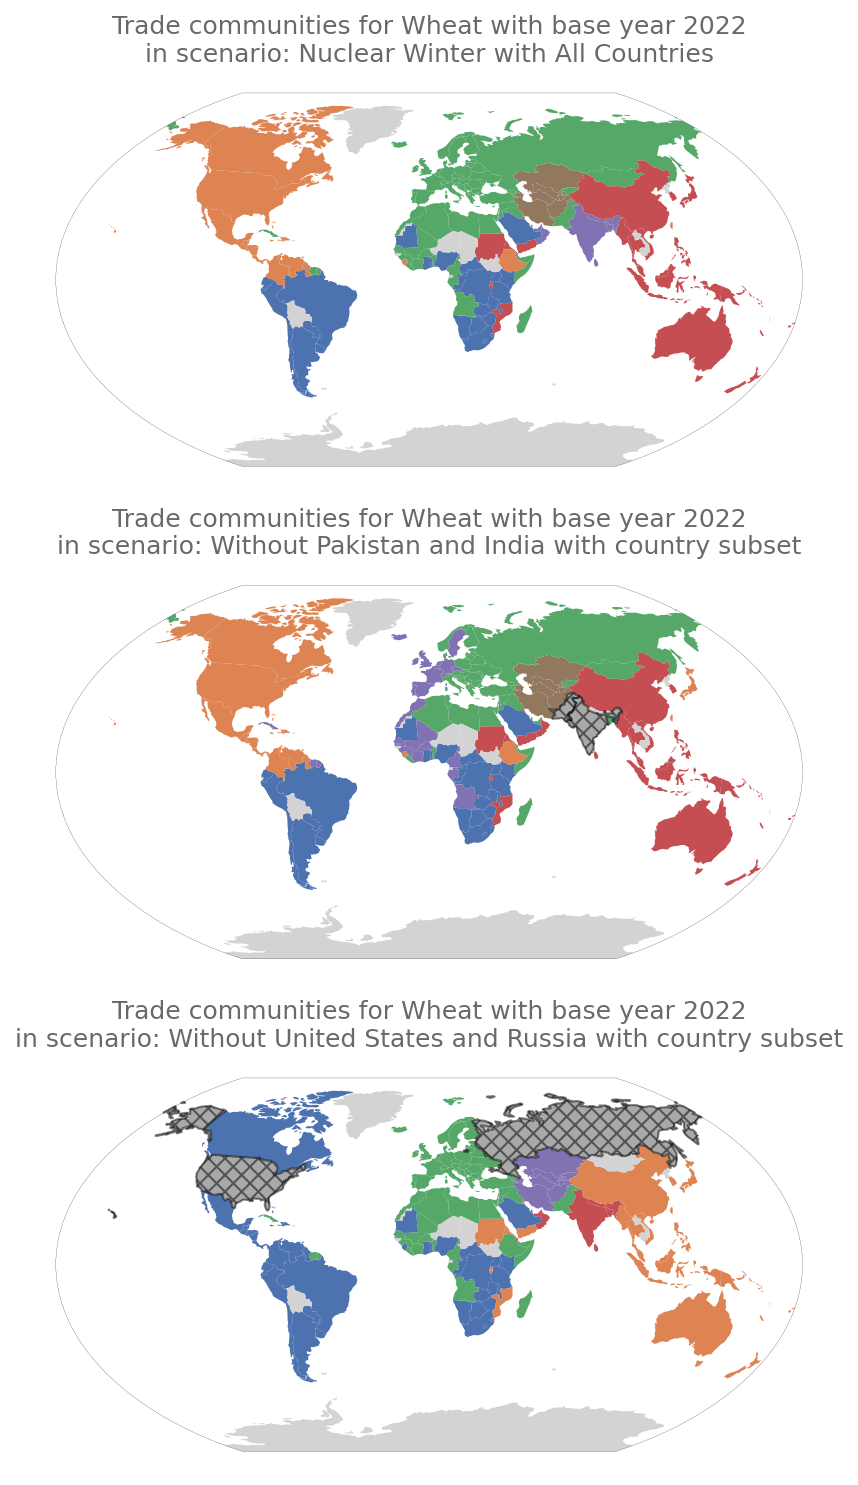

In [4]:
comparison.plot_all_trade_communities(figsize=(15, 10))

We can also try to quantify how different the communities are in each scenario for each country.
The natural way of doing this is the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
It measures the similarity between two sets.
So for each country we can compute a Jaccard distance (1-Jaccard index)
showing us by how much for each country their community changed in comparison with the base scenario.

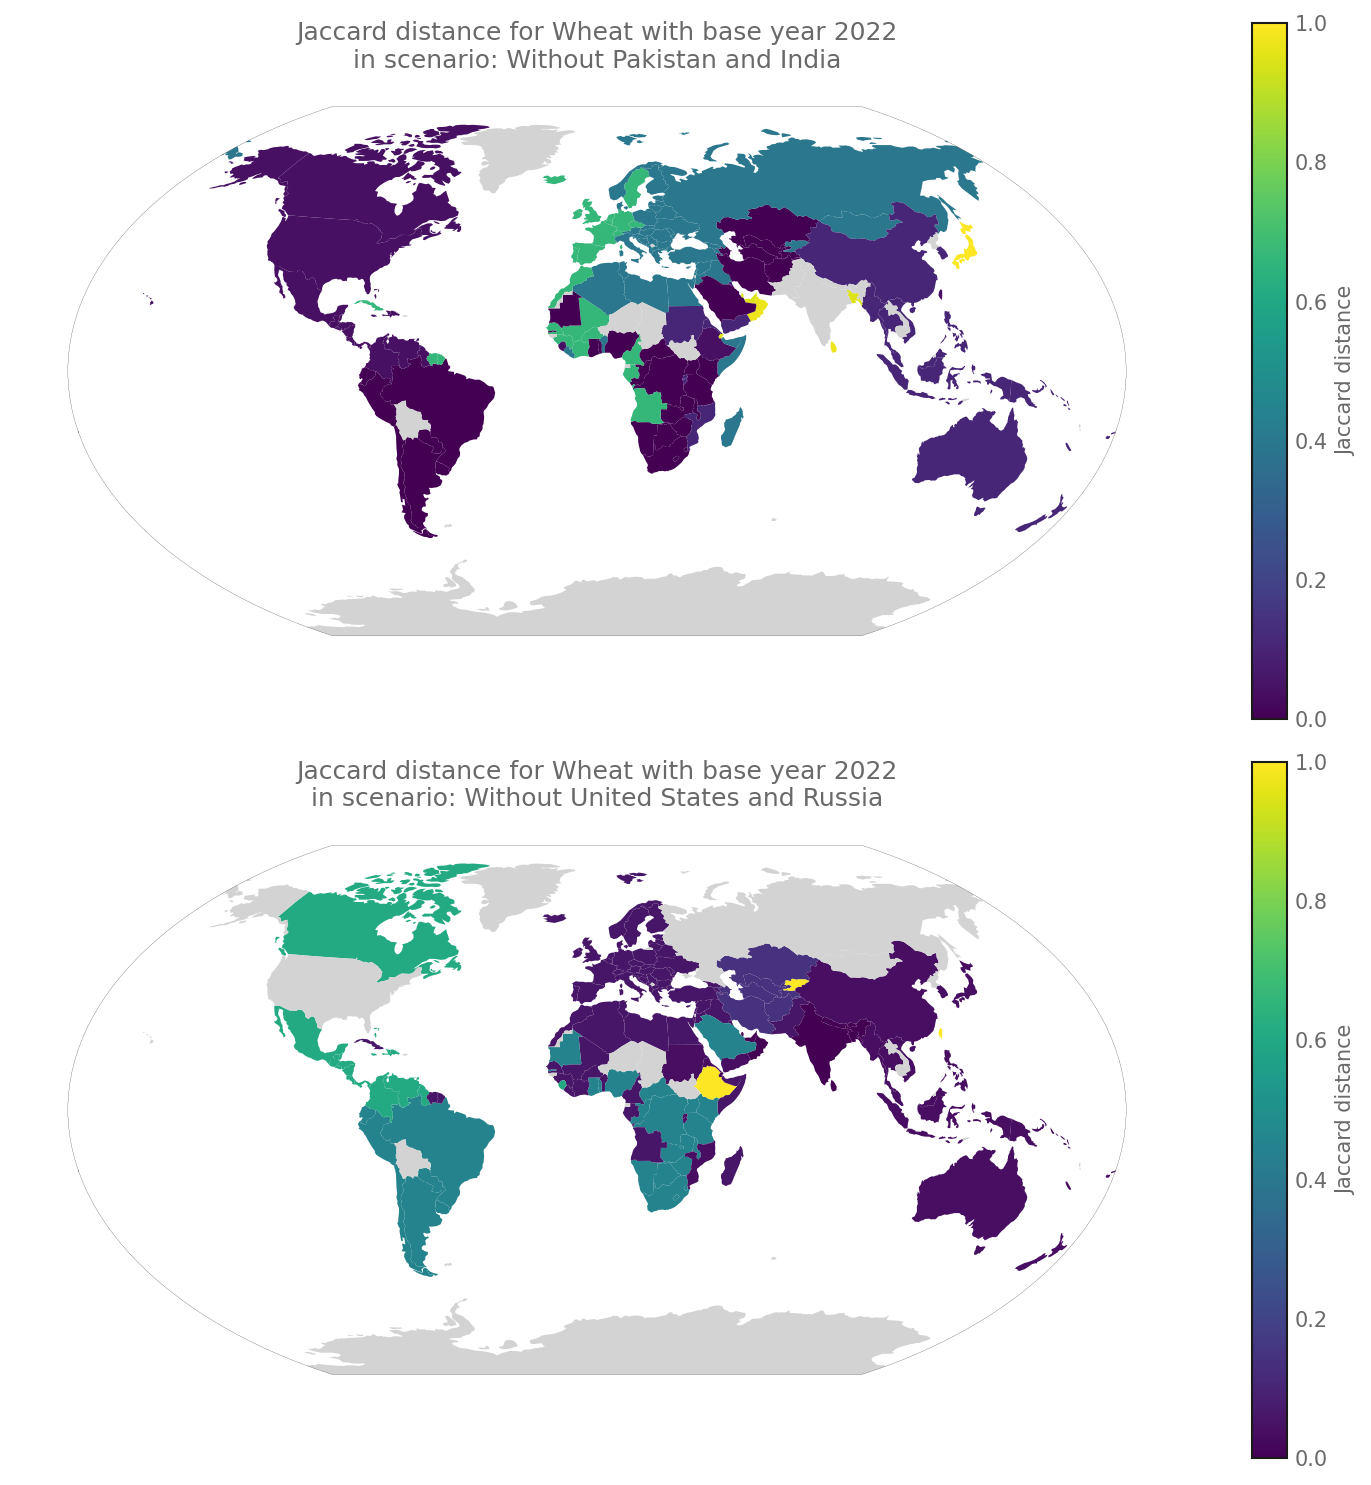

In [5]:
comparison.plot_community_difference(figsize=(10, 10), vmin=0, vmax=1)

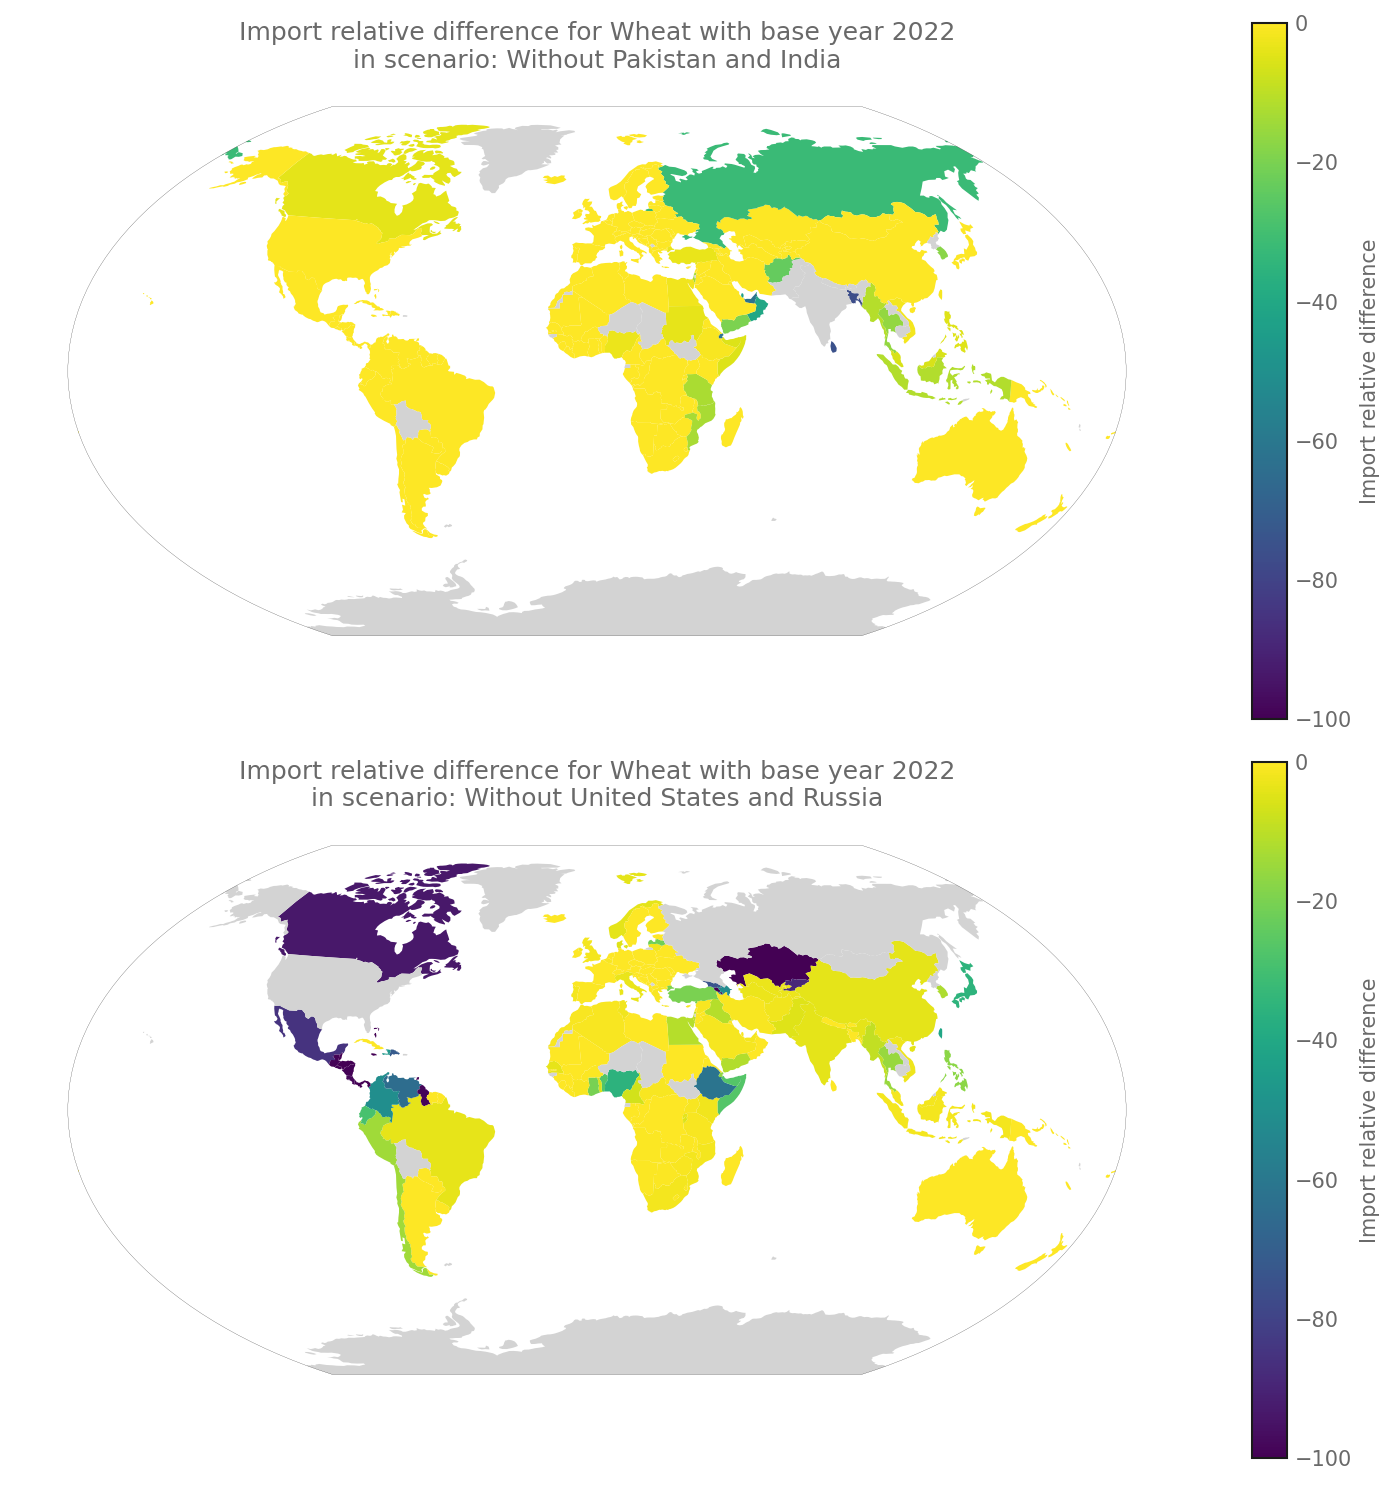

In [6]:
comparison.plot_imports_difference(figsize=(10, 10), vmin=-100, vmax=0)

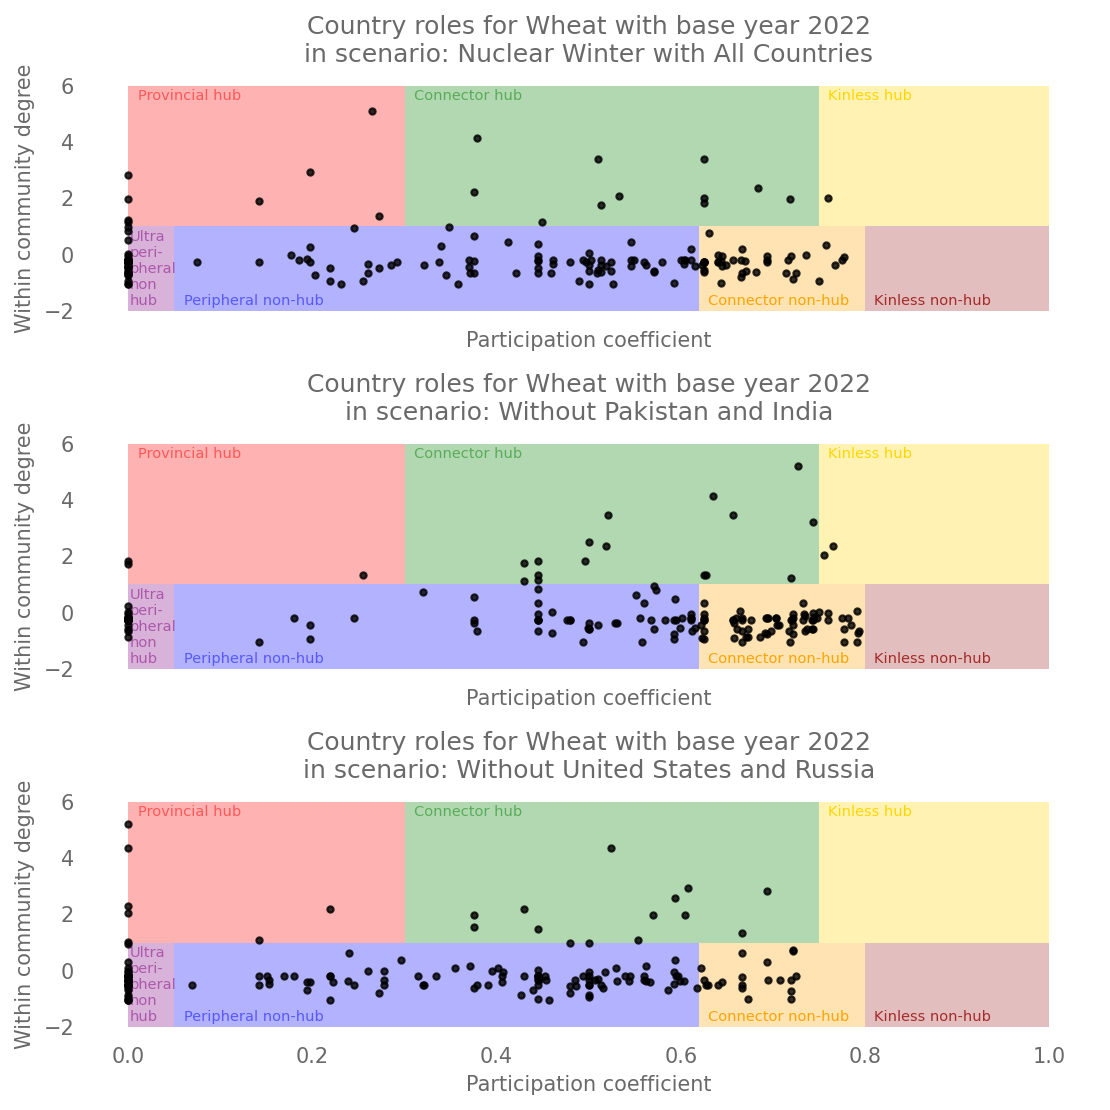

In [7]:
comparison.plot_roles()

We can also study the degree centralities (in and out) for all networks:

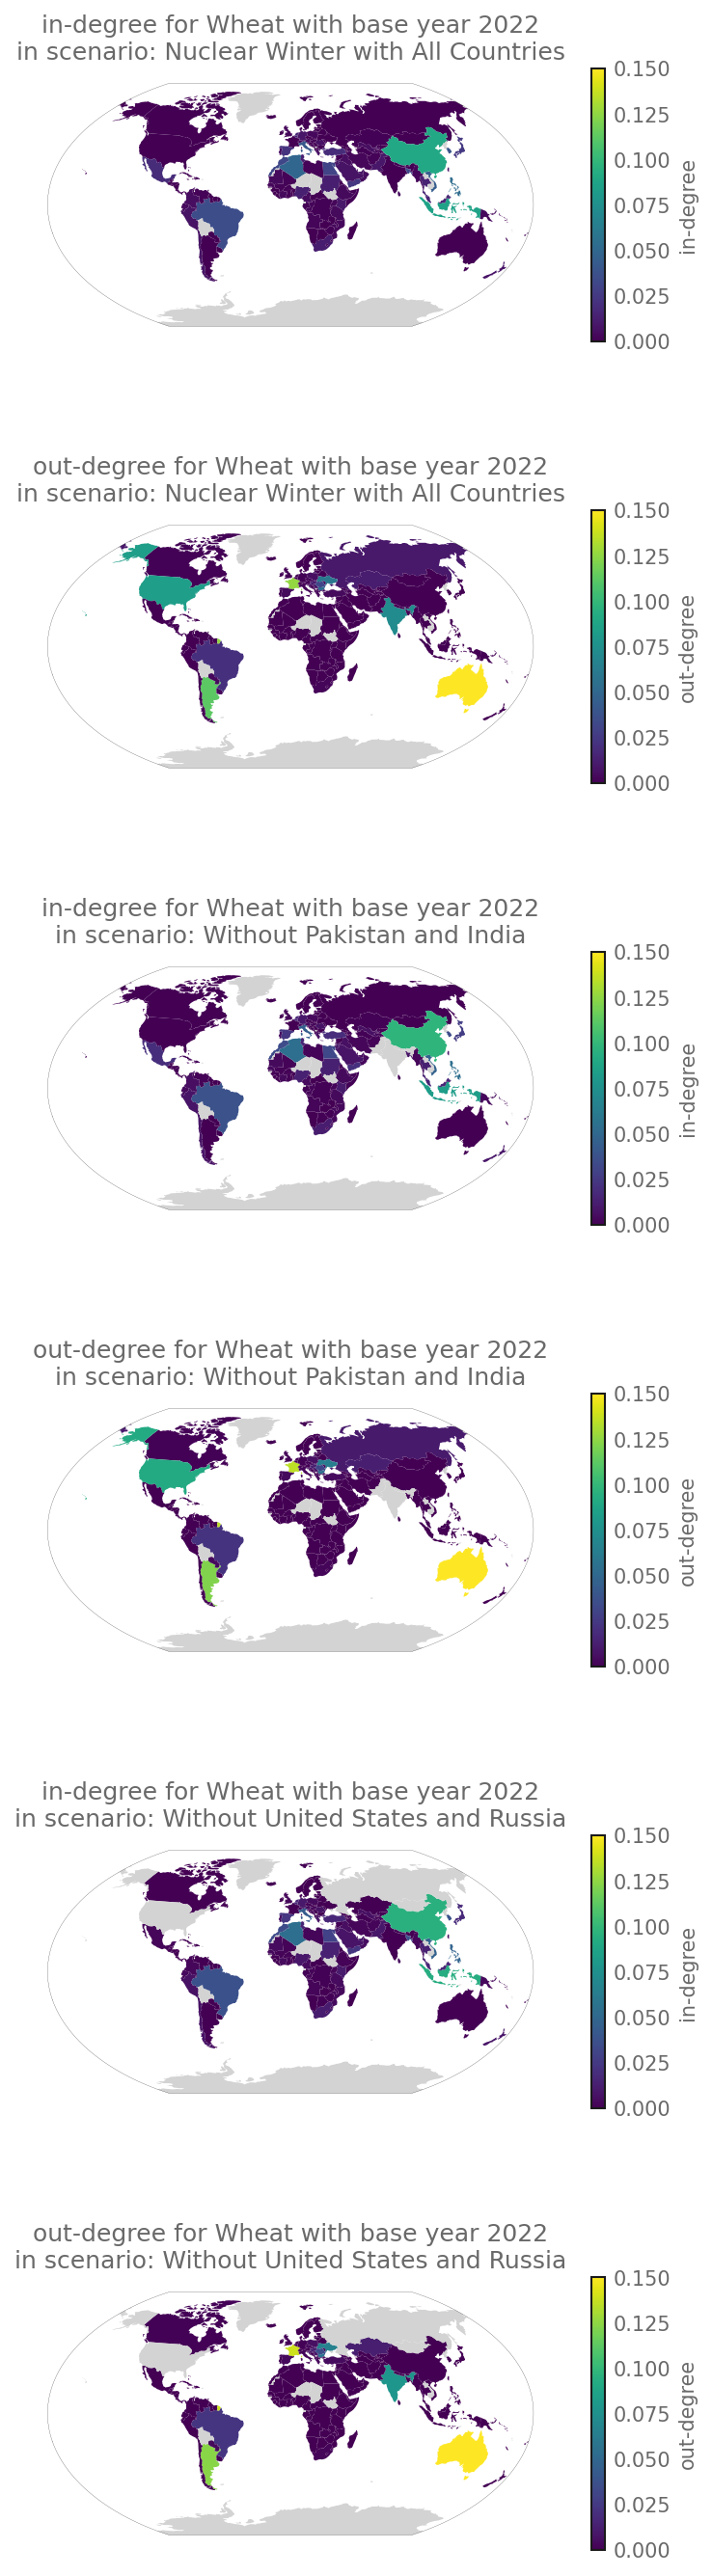

In [8]:
comparison.plot_centrality_maps(figsize=(5, 25), shrink=0.2, vmin=0, vmax=0.15)

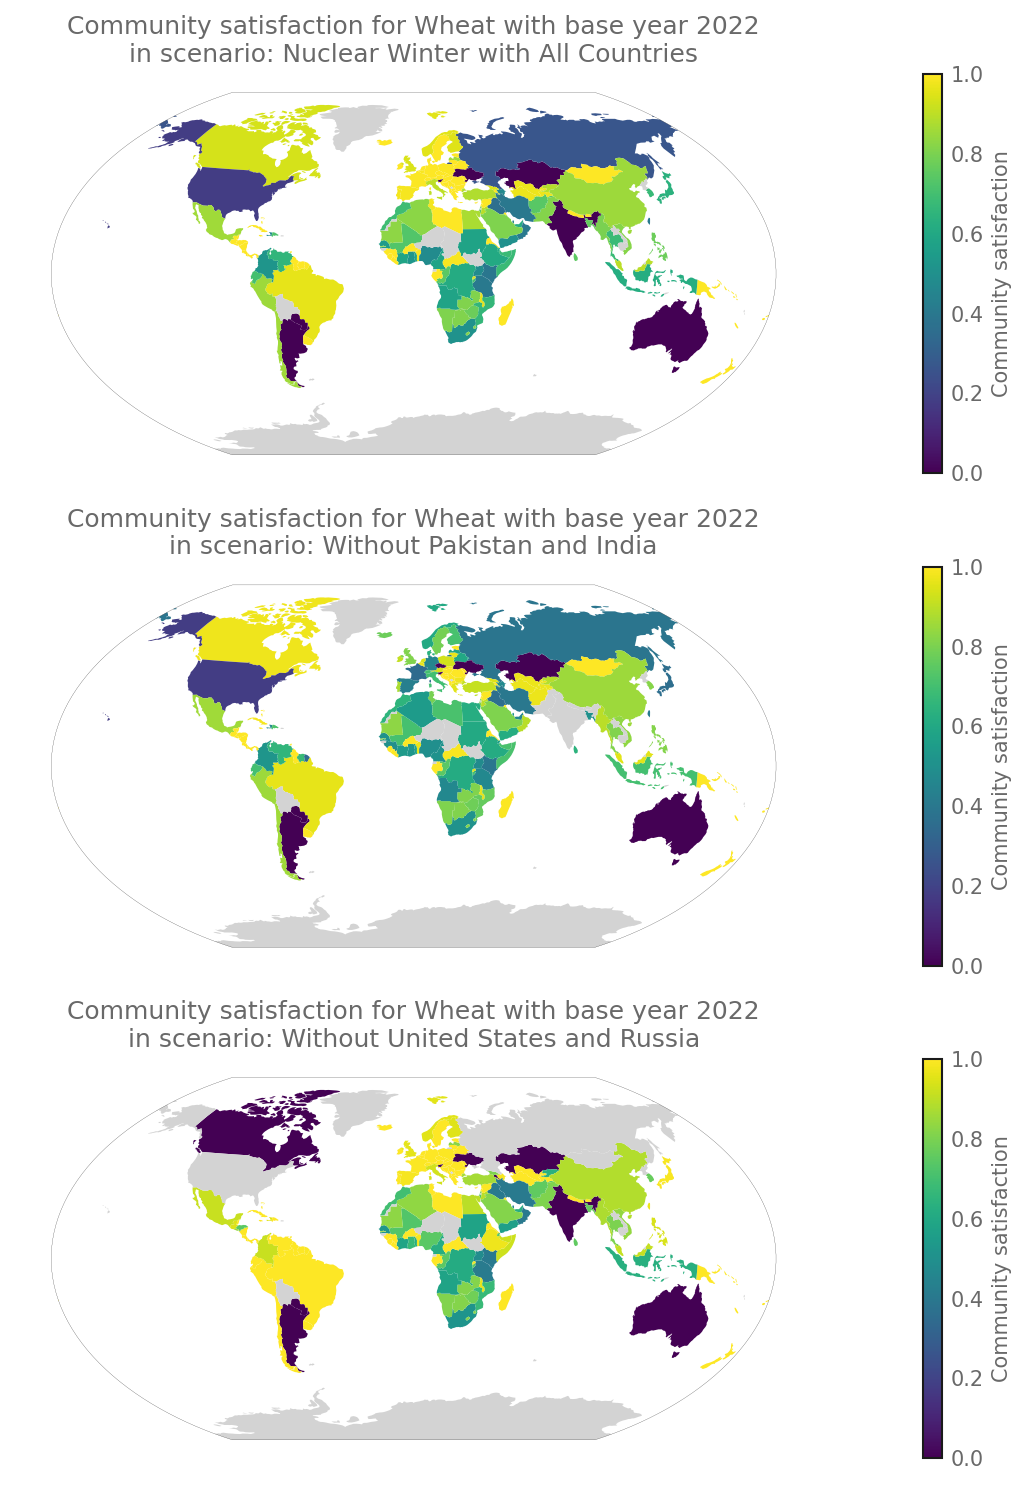

In [9]:
comparison.plot_community_satisfaction(figsize=(15, 10))

and the difference from base scenario:

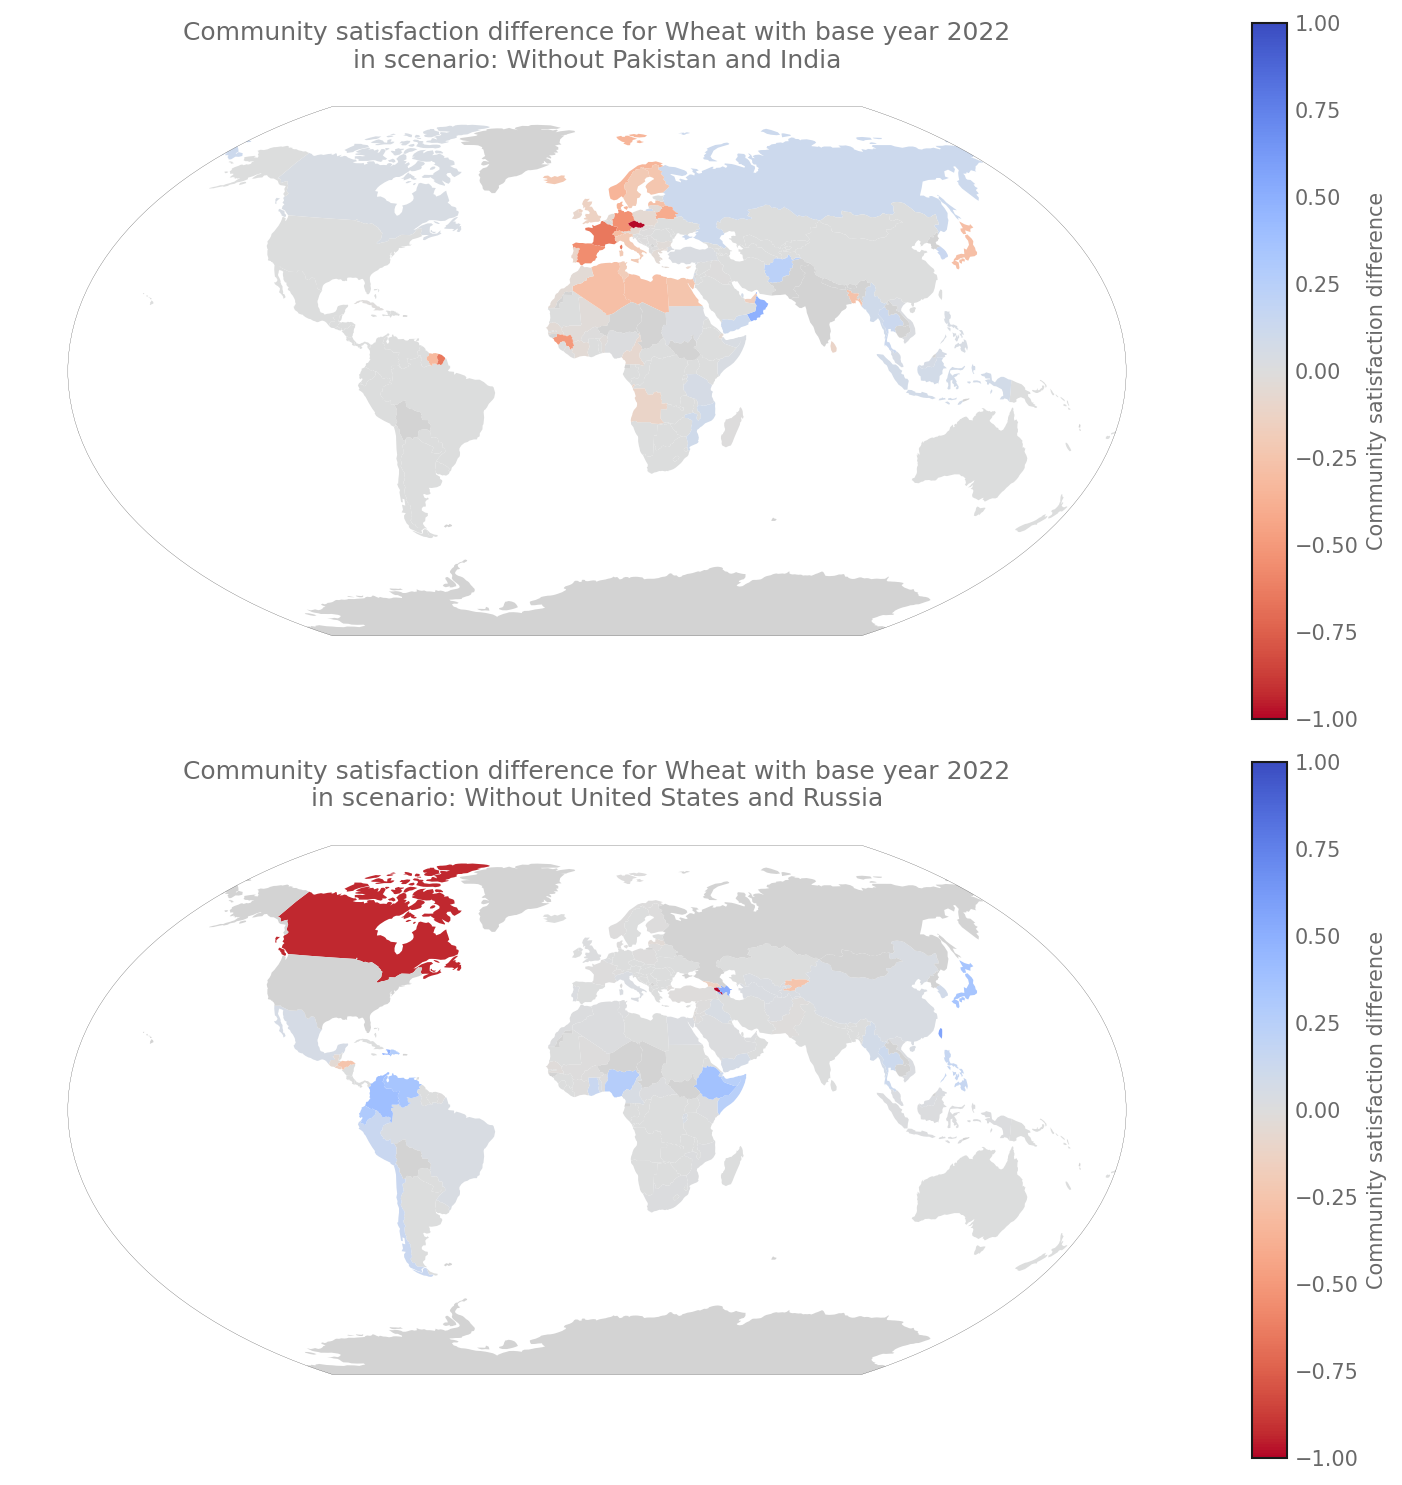

In [10]:
comparison.plot_community_satisfaction_difference(figsize=(10,10), vmin=-1, vmax=1, cmap="coolwarm_r")

We also can look at country's stability index, which is a measure of how easily each country can replace their import partners (same paper as community satisfaction).

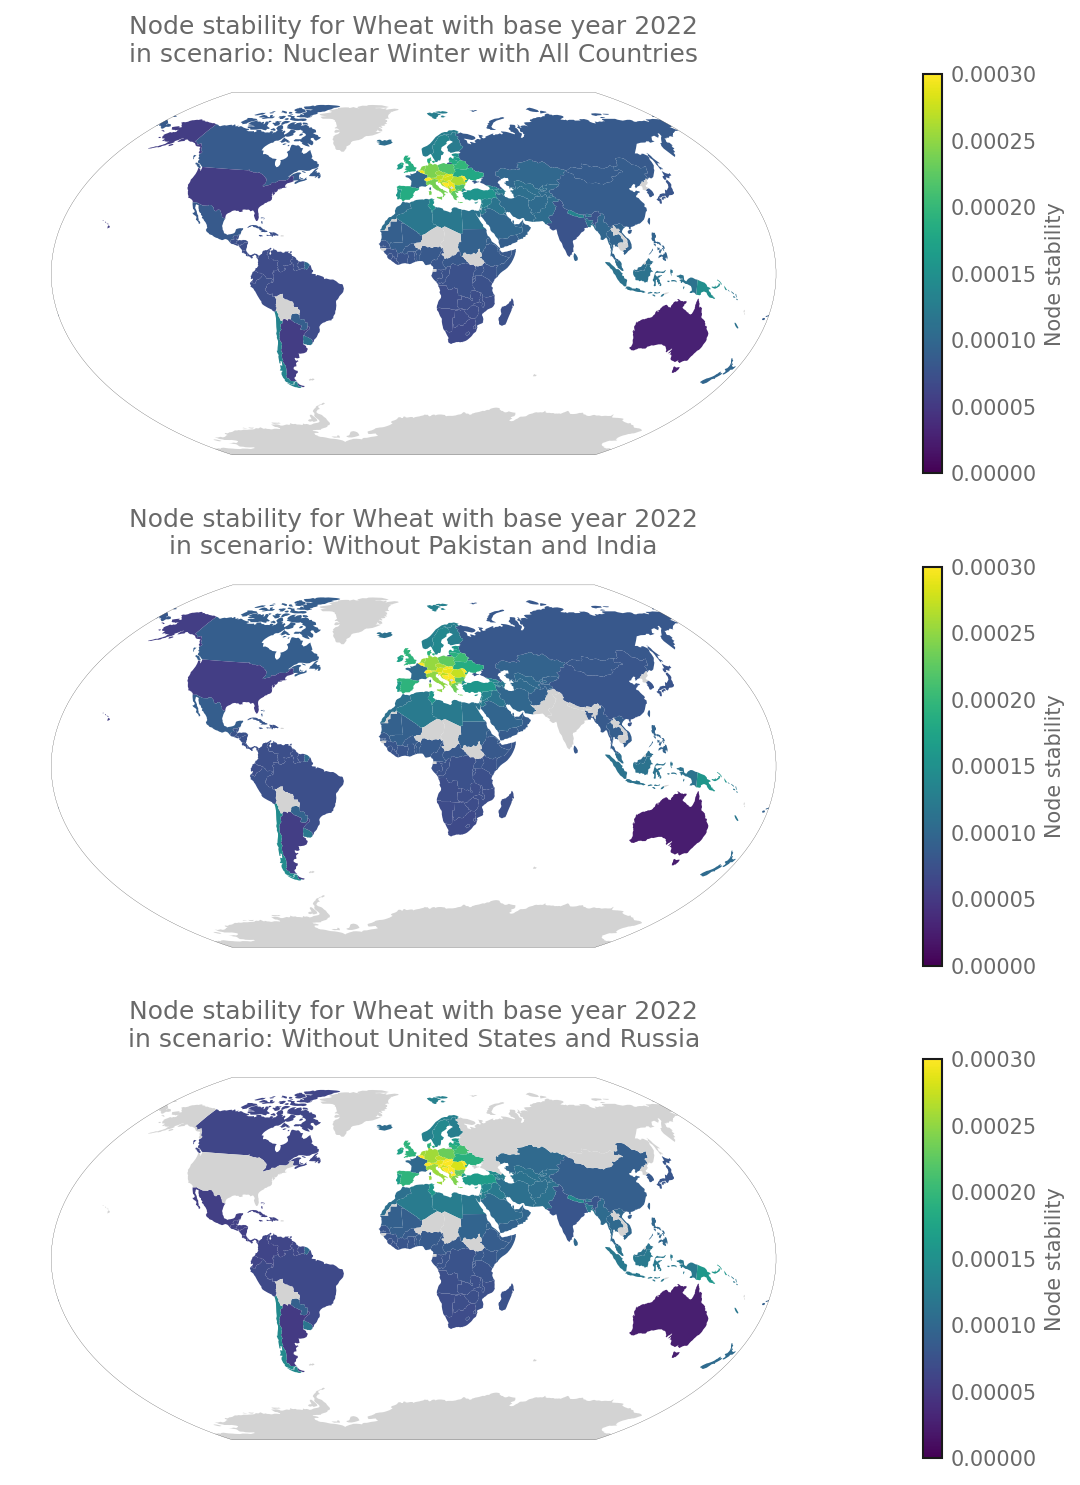

In [11]:
comparison.plot_node_stability(figsize=(15, 10), vmin=0, vmax=0.0003) # figsize works here too of course

The units are dimensionless, so it is better to look at the relative change of the node stability to get a better view. 
For this reason we can look at the *relative* change of this metric:

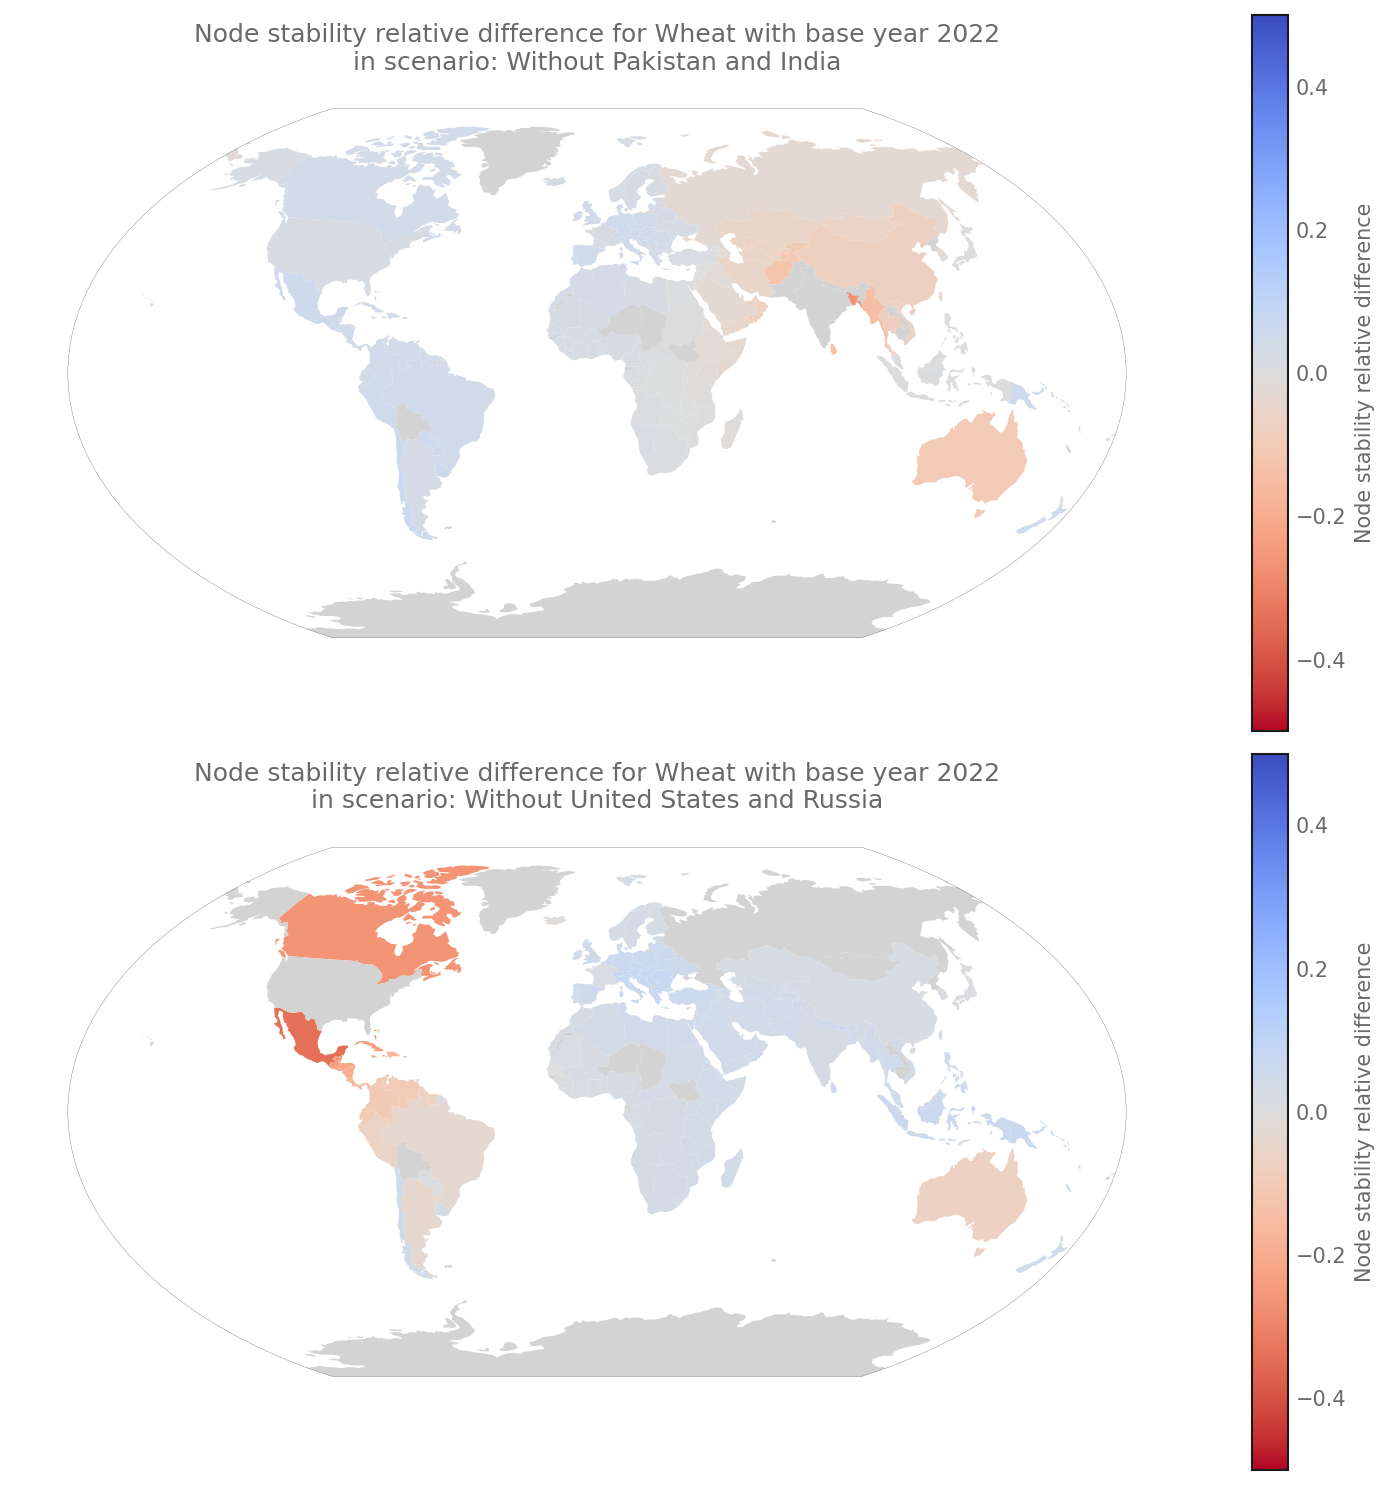

In [12]:
comparison.plot_node_stability_difference(figsize=(10, 10), vmin=-0.5, vmax=0.5, cmap="coolwarm_r")

Another important aspect of a network is its resilience to attacks, and we can see that as well:

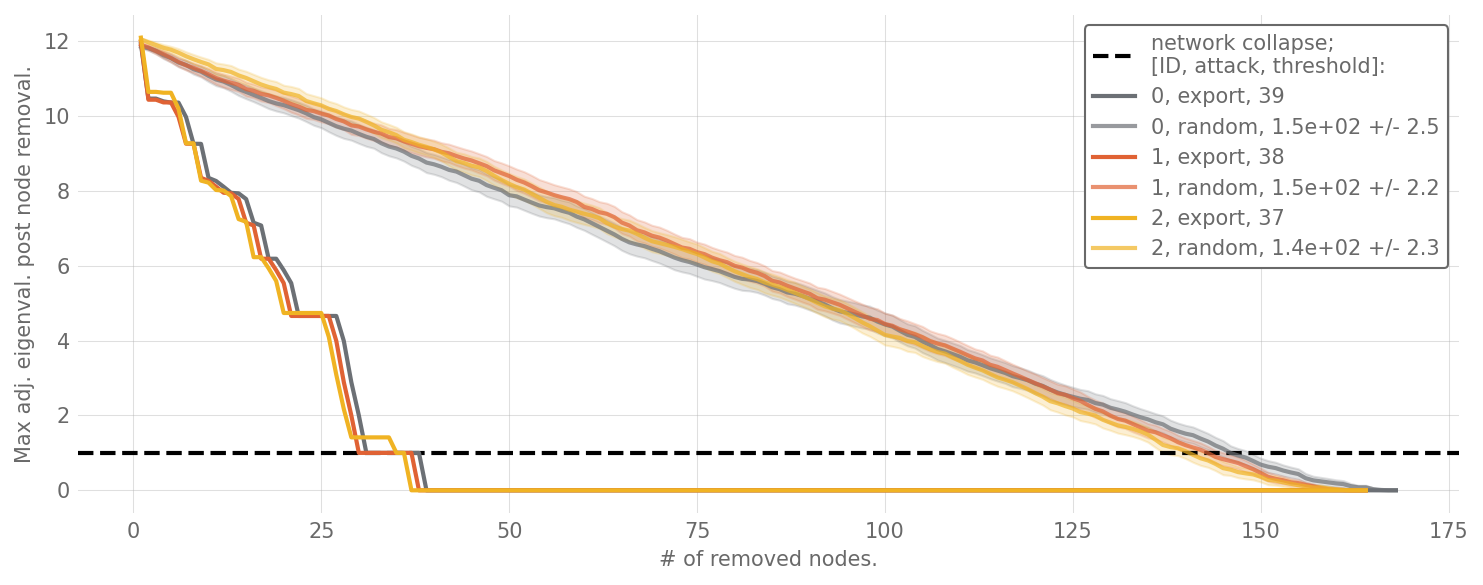

In [13]:
comparison.plot_attack_resilience(exclude_attacks="entropic")